In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from datetime import datetime

plt.style.use("tableau-colorblind10")

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",\
         7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

week_day_dict = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday",\
         7:"Sunday"}

dict_label = {"Month":month_dict, "Week_Day":week_day_dict}

In [29]:
traffic = pd.read_csv("traffic-over-time-comp-line_2022-03-21_2023-03-20.csv", header = 1, index_col = 0, \
                     names = ["Day", "Site_Sessions"], parse_dates = [1])

In [30]:
traffic.head()

,Day,Site_Sessions
1,2022-11-13 00:00:00,130
2,2022-05-30 00:00:00,92
3,2022-07-19 00:00:00,68
4,2022-05-31 00:00:00,62
5,2023-03-12 00:00:00,58


In [60]:
months = [datetime.strptime(i, "%Y-%m-%d %H:%M:%S").month for i in traffic["Day"]]
week_day = [datetime.strptime(i, "%Y-%m-%d %H:%M:%S").isoweekday() for i in traffic["Day"]]
traffic["Month"] = np.array(months).astype("int")
traffic["Week_Day"] = np.array(week_day).astype("int")
traffic["Site_Sessions"] = np.array(traffic["Site_Sessions"]).astype("int")

In [61]:
traffic.head()

,Day,Site_Sessions,Month,Week_Day
1,2022-11-13 00:00:00,130,11,7
2,2022-05-30 00:00:00,92,5,1
3,2022-07-19 00:00:00,68,7,2
4,2022-05-31 00:00:00,62,5,2
5,2023-03-12 00:00:00,58,3,7


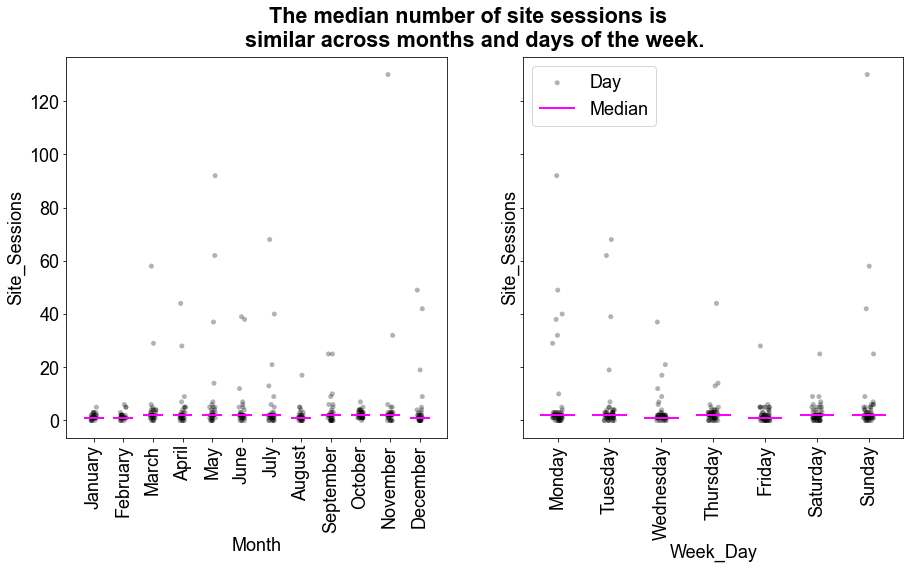

In [170]:
plots, axes = plt.subplots(1,2,figsize = (15,7), sharey= True)
x_values = ["Month", "Week_Day"]

for i, ax_it in enumerate(axes.flat):
    sns.stripplot(data = traffic, x = x_values[i], y = "Site_Sessions",\
                  color = "black", alpha = 0.3,jitter = True, ax = ax_it, zorder = 1, label = "Day")
    
    new_labs = []
    
    for j, xt in enumerate(ax_it.get_xticklabels()):
        
        v = int(xt.get_text())
        
        median_val = traffic.loc[traffic[x_values[i]]==v, "Site_Sessions"].median()
        ax_it.hlines(y = median_val, xmin = j-1/3, xmax = j+1/3, color = "magenta", linewidth = 2, zorder = 2, \
                    label = "Median")
        
        new_labs.append(dict_label[x_values[i]][v])
    
    ax_it.set_xticklabels(new_labs, rotation = 90)
        
ha, lab = axes[0].get_legend_handles_labels()

plt.legend(handles = [ha[0], ha[-1]], labels = [lab[0], lab[-1]]) #, bbox_to_anchor = [1,1])

plt.suptitle("The median number of site sessions is \n similar across months and days of the week.", \
            fontweight = "bold")
plt.show()